In [108]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [75]:
#Loading data

df = pd.read_csv("../data/movie_metadata.csv")

# EDA

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [76]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [82]:
df.dropna(inplace=True)
df.drop_duplicates(subset='movie_title', inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3654 non-null   object 
 1   director_name              3654 non-null   object 
 2   num_critic_for_reviews     3654 non-null   float64
 3   duration                   3654 non-null   float64
 4   director_facebook_likes    3654 non-null   float64
 5   actor_3_facebook_likes     3654 non-null   float64
 6   actor_2_name               3654 non-null   object 
 7   actor_1_facebook_likes     3654 non-null   float64
 8   gross                      3654 non-null   float64
 9   genres                     3654 non-null   object 
 10  actor_1_name               3654 non-null   object 
 11  movie_title                3654 non-null   object 
 12  num_voted_users            3654 non-null   int64  
 13  cast_total_facebook_likes  3654 non-null   int64

<Axes: xlabel='imdb_score', ylabel='Count'>

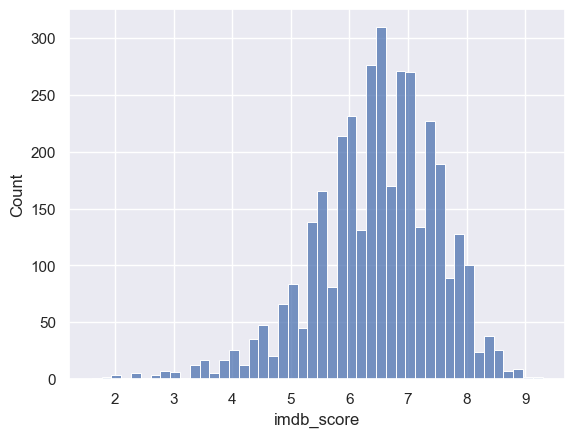

In [46]:
sns.histplot(df['imdb_score'])

In [40]:
# Searching for the most popualar directors
df['director_name'].nunique()

1658

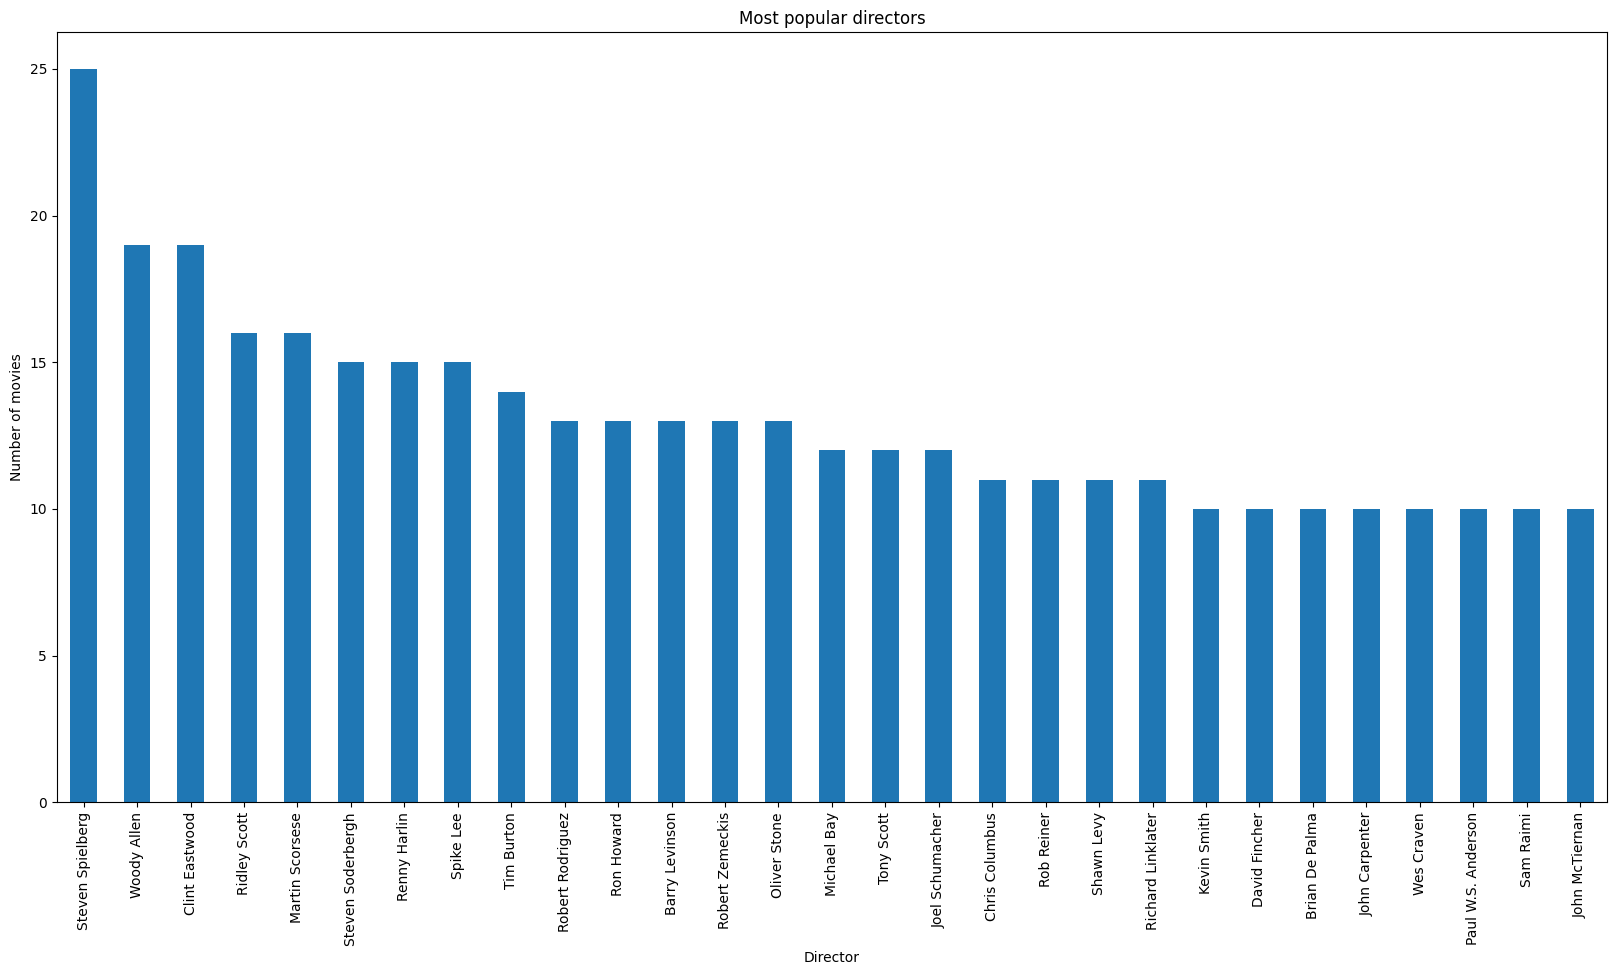

In [11]:
produced_movies = df['director_name'].value_counts()

plt.figure(figsize=(20, 10))
produced_movies[produced_movies >= 10].plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.title("Most popular directors")
plt.show()

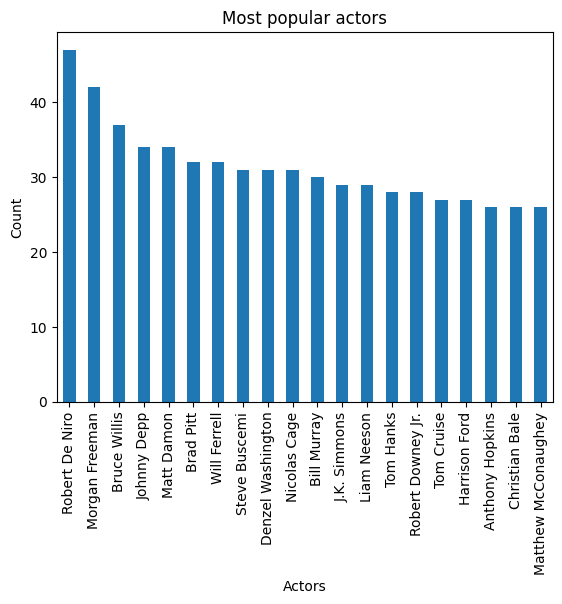

In [17]:
# Searching for the most popular actors
actors_df = df[['actor_1_name', 'actor_2_name', 'actor_3_name']]

actors_df = actors_df.values.flatten()
value_counts = pd.Series(actors_df).value_counts()
value_counts = value_counts[value_counts > 25]

# Plot the value counts
value_counts.plot(kind='bar')

# Set the plot title and labels
plt.title('Most popular actors')
plt.xlabel('Actors')
plt.ylabel('Count')

# Display the plot
plt.show()


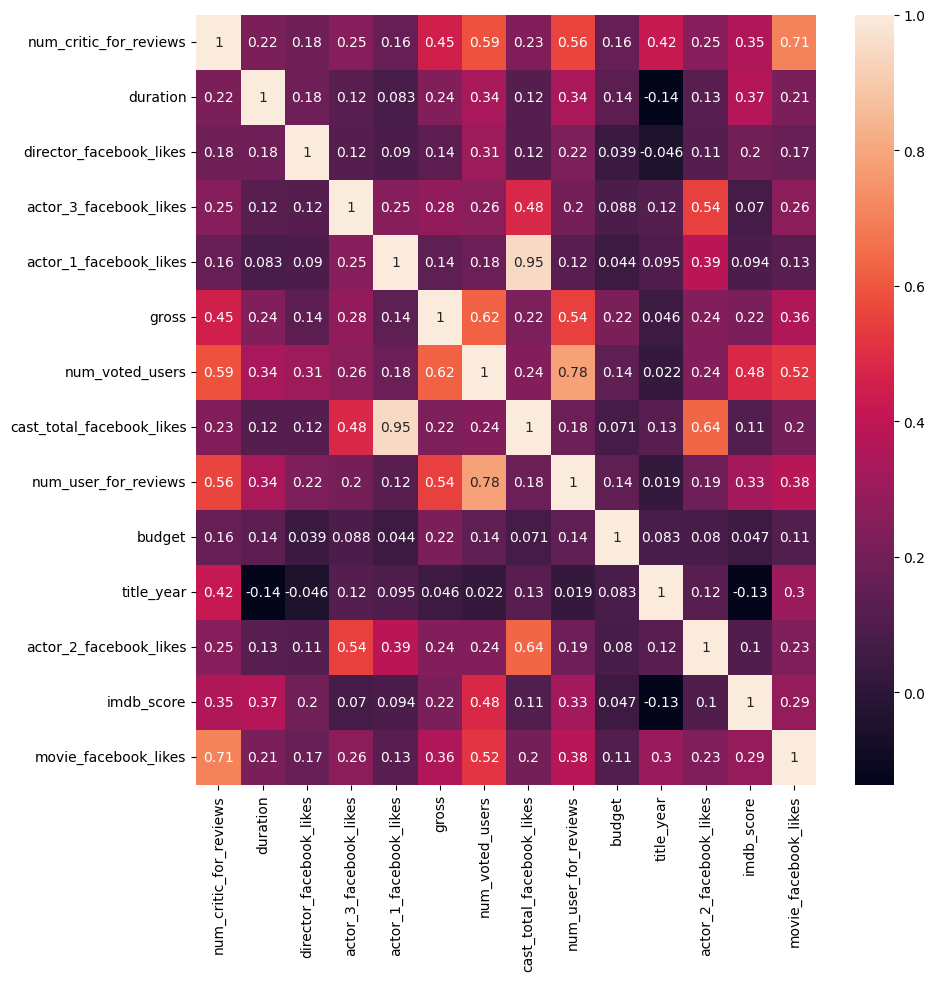

In [36]:
columns = ['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes']

heatmap_df = df[columns]

plt.figure(figsize=(10, 10))
corr = heatmap_df.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

c:\Users\Rokas\Desktop\capstone_project\.venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


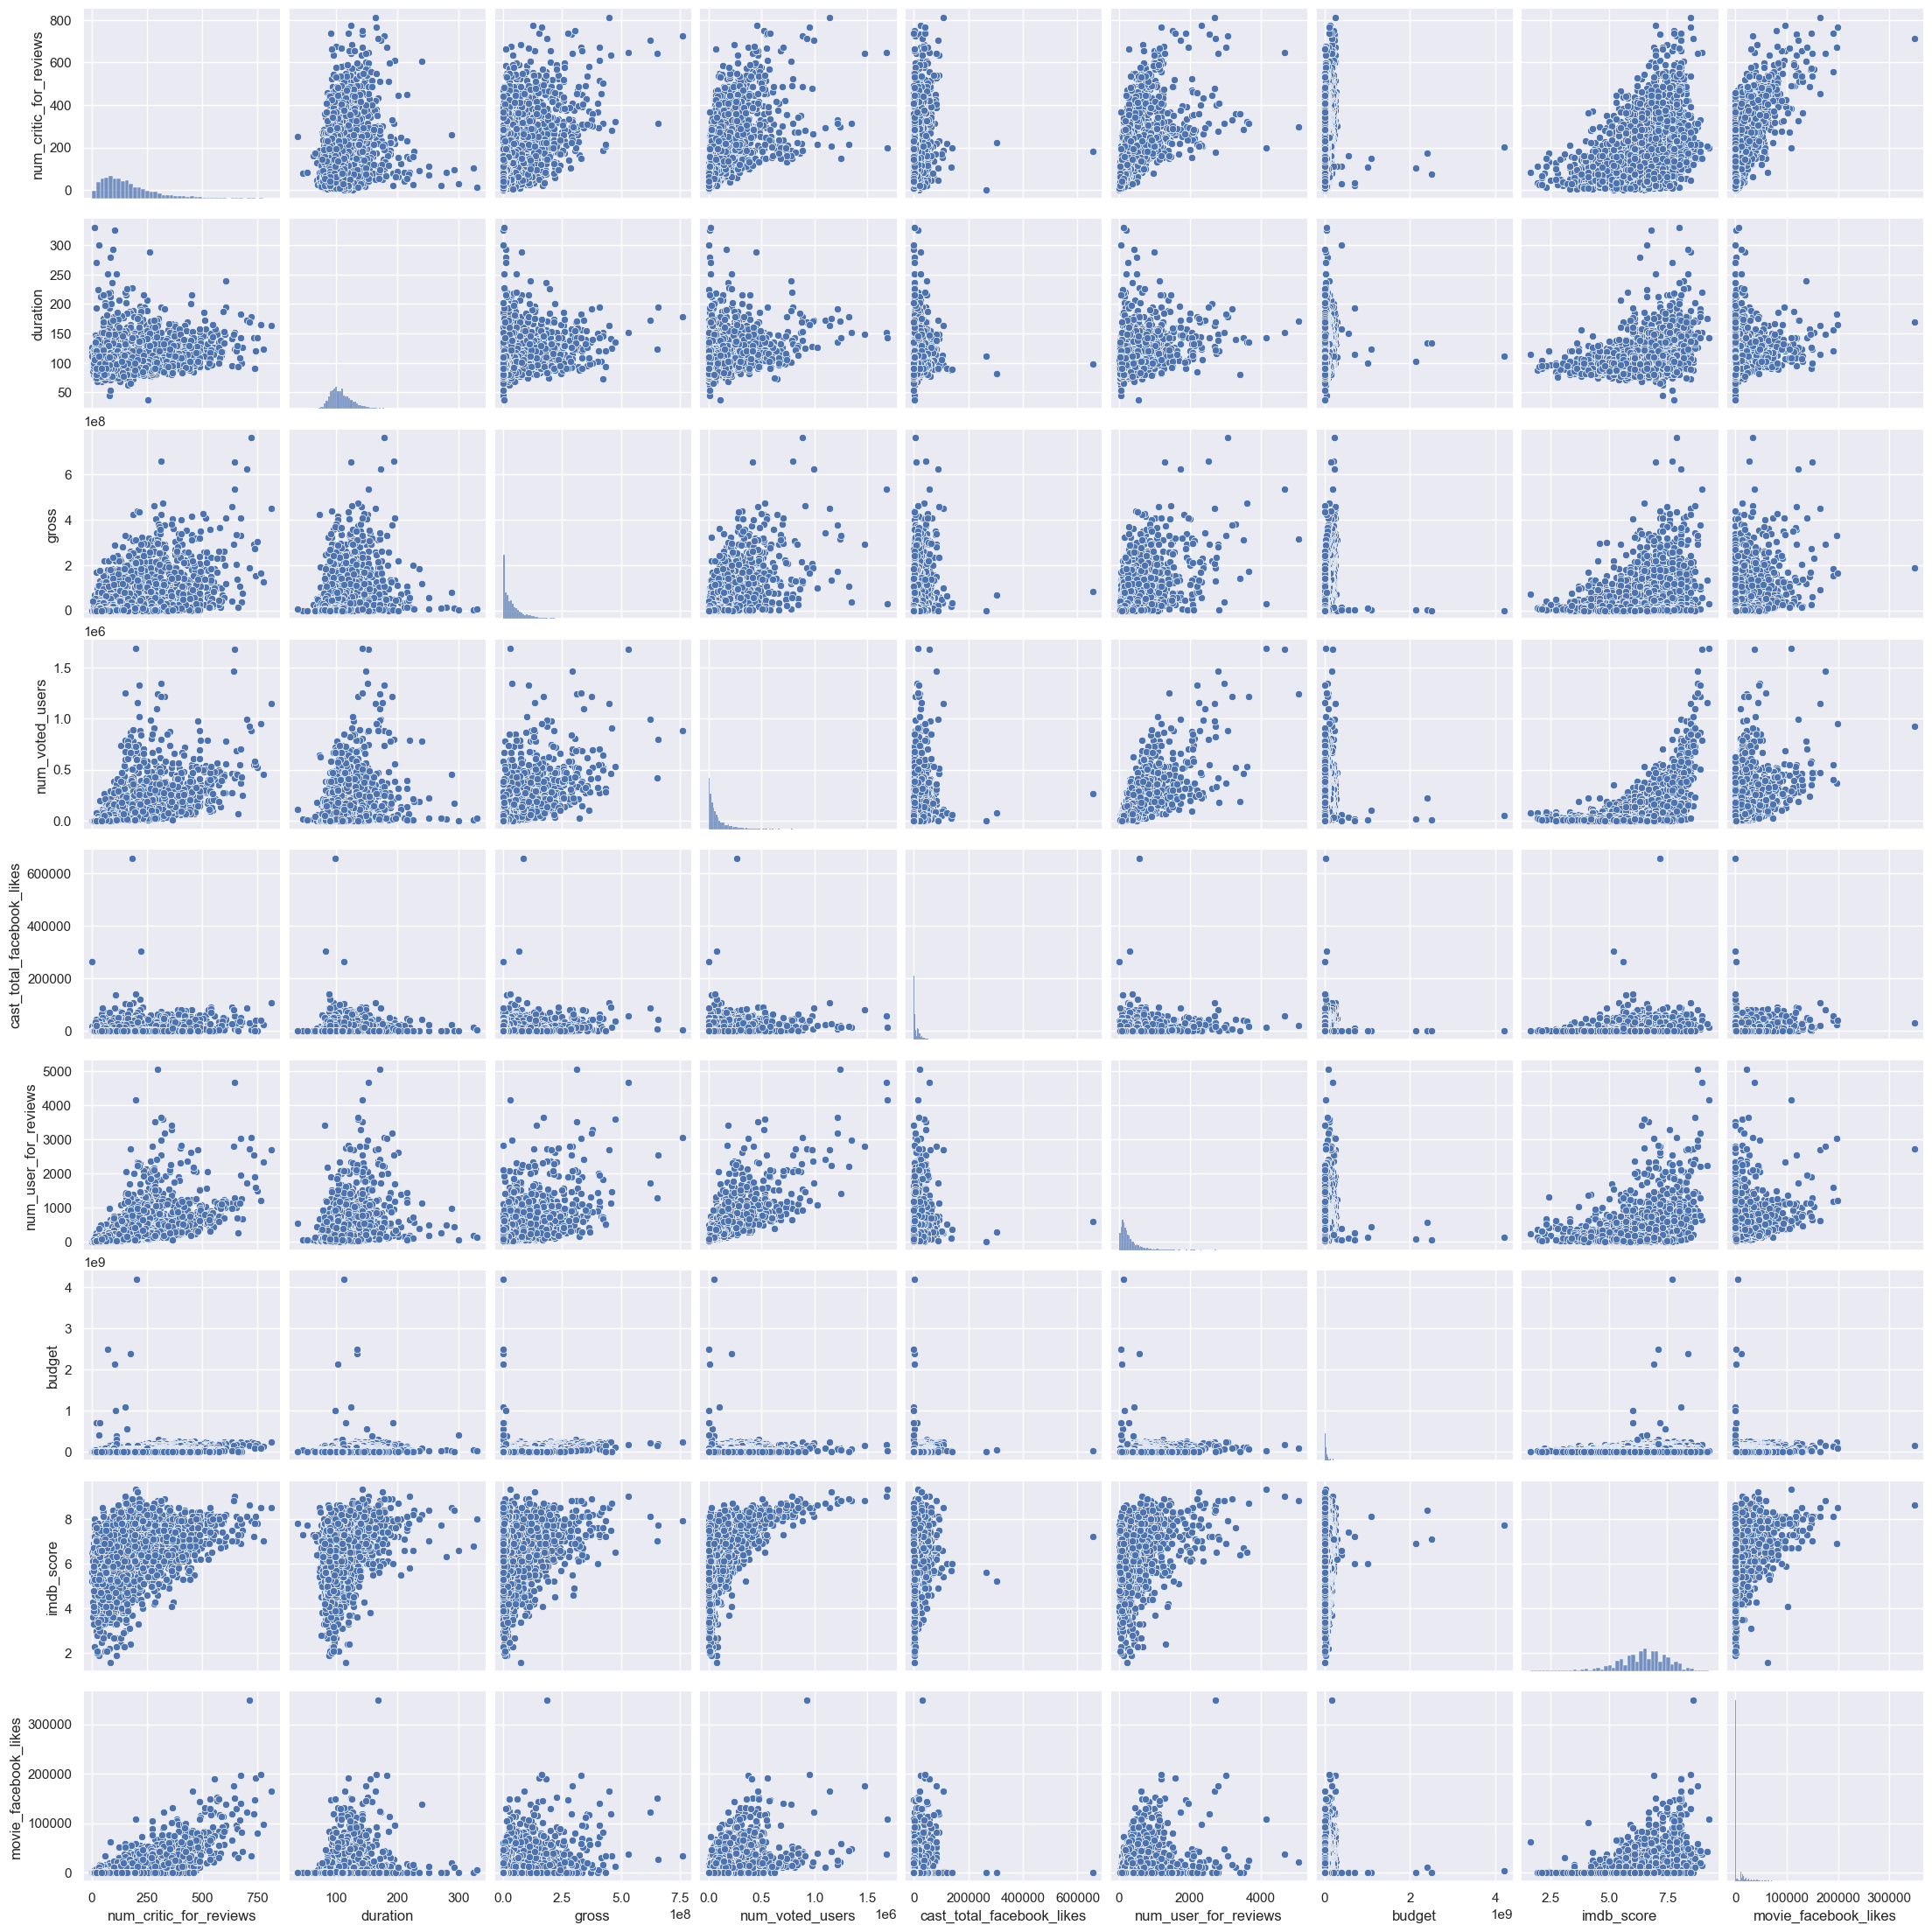

In [38]:
sns.set()
cols = ['num_critic_for_reviews', 'duration',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'budget', 'imdb_score', 'movie_facebook_likes']
sns.pairplot(df[cols], size = 2.5)
plt.show()

# Data Preprocessing and Feature Engineering

In [89]:
# Calculate the number of movies each actor has starred in
director_counts = df['director_name'].value_counts()

# Create a dictionary mapping actor names to their number of movie appearances
actor_dict = dict(director_counts)

# Create a new column 'actor_group'
def assign_actor_group(x):
    if actor_dict[x['director_name']] > 10:
        return 3
    elif actor_dict[x['director_name']] >= 3:
        return 2
    else:
        return 1

df['director_group'] = df.apply(assign_actor_group, axis=1)

In [87]:
# Calculate the number of movies each actor has starred in
actor_counts = df['actor_1_name'].value_counts()

# Create a dictionary mapping actor names to their number of movie appearances
actor_dict = dict(actor_counts)

# Create a new column 'actor_group'
def assign_actor_group(x):
    if actor_dict[x['actor_1_name']] > 25:
        return 3
    elif actor_dict[x['actor_1_name']] >= 3:
        return 2
    else:
        return 1

df['actor_1_group'] = df.apply(assign_actor_group, axis=1)

# Calculate the number of movies each actor has starred in
actor_counts = df['actor_2_name'].value_counts()

# Create a dictionary mapping actor names to their number of movie appearances
actor_dict = dict(actor_counts)

# Create a new column 'actor_group'
def assign_actor_group(x):
    if actor_dict[x['actor_2_name']] > 25:
        return 3
    elif actor_dict[x['actor_2_name']] >= 3:
        return 2
    else:
        return 1

df['actor_2_group'] = df.apply(assign_actor_group, axis=1)

# Calculate the number of movies each actor has starred in
actor_counts = df['actor_3_name'].value_counts()

# Create a dictionary mapping actor names to their number of movie appearances
actor_dict = dict(actor_counts)

# Create a new column 'actor_group'
def assign_actor_group(x):
    if actor_dict[x['actor_3_name']] > 25:
        return 3
    elif actor_dict[x['actor_3_name']] >= 3:
        return 2
    else:
        return 1

df['actor_3_group'] = df.apply(assign_actor_group, axis=1)

### Cleaning outliers

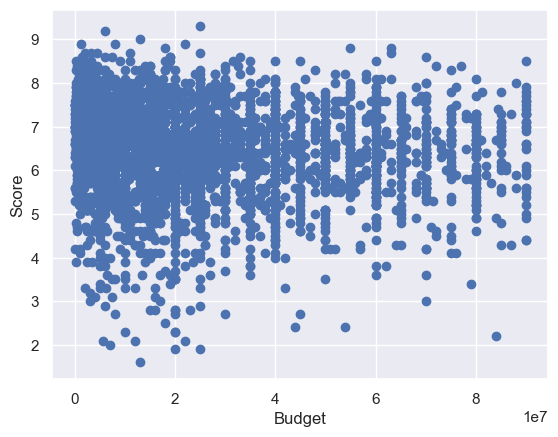

In [98]:
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the budget column in the original dataframe
df = df[(df['budget'] >= lower_bound) & (df['budget'] <= upper_bound)]

# Plot the budget vs score
plt.scatter(df['budget'], df['imdb_score'])
plt.xlabel('Budget')
plt.ylabel('Score')
plt.show()


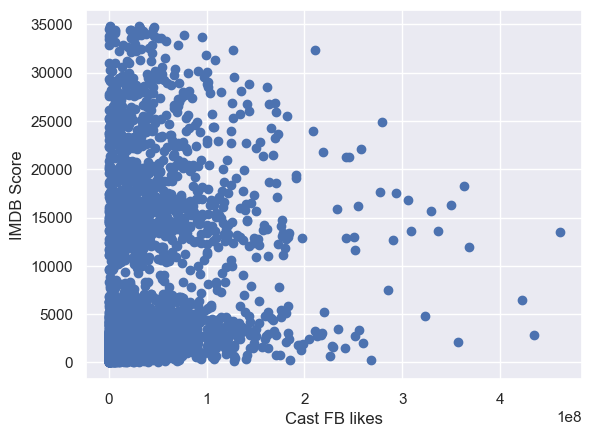

In [103]:
Q1 = df['cast_total_facebook_likes'].quantile(0.25)
Q3 = df['cast_total_facebook_likes'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the budget column in the original dataframe
df = df[(df['cast_total_facebook_likes'] >= lower_bound) & (df['cast_total_facebook_likes'] <= upper_bound)]

plt.scatter(df['gross'], df['cast_total_facebook_likes'])
plt.xlabel('Cast FB likes')
plt.ylabel('IMDB Score')
plt.show()

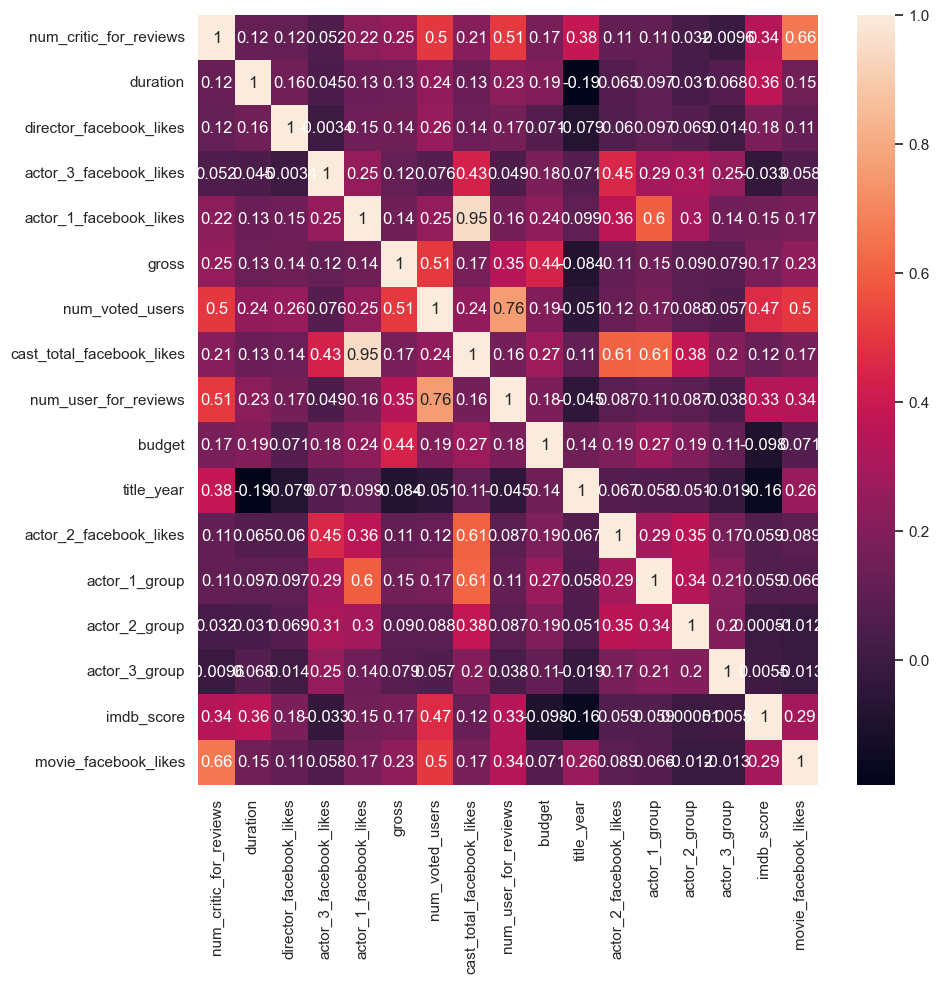

In [104]:
columns = ['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes', 'actor_1_group', 'actor_2_group', 'actor_3_group',
       'imdb_score', 'movie_facebook_likes']

heatmap_df = df[columns]

plt.figure(figsize=(10, 10))
corr = heatmap_df.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

c:\Users\Rokas\Desktop\capstone_project\.venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


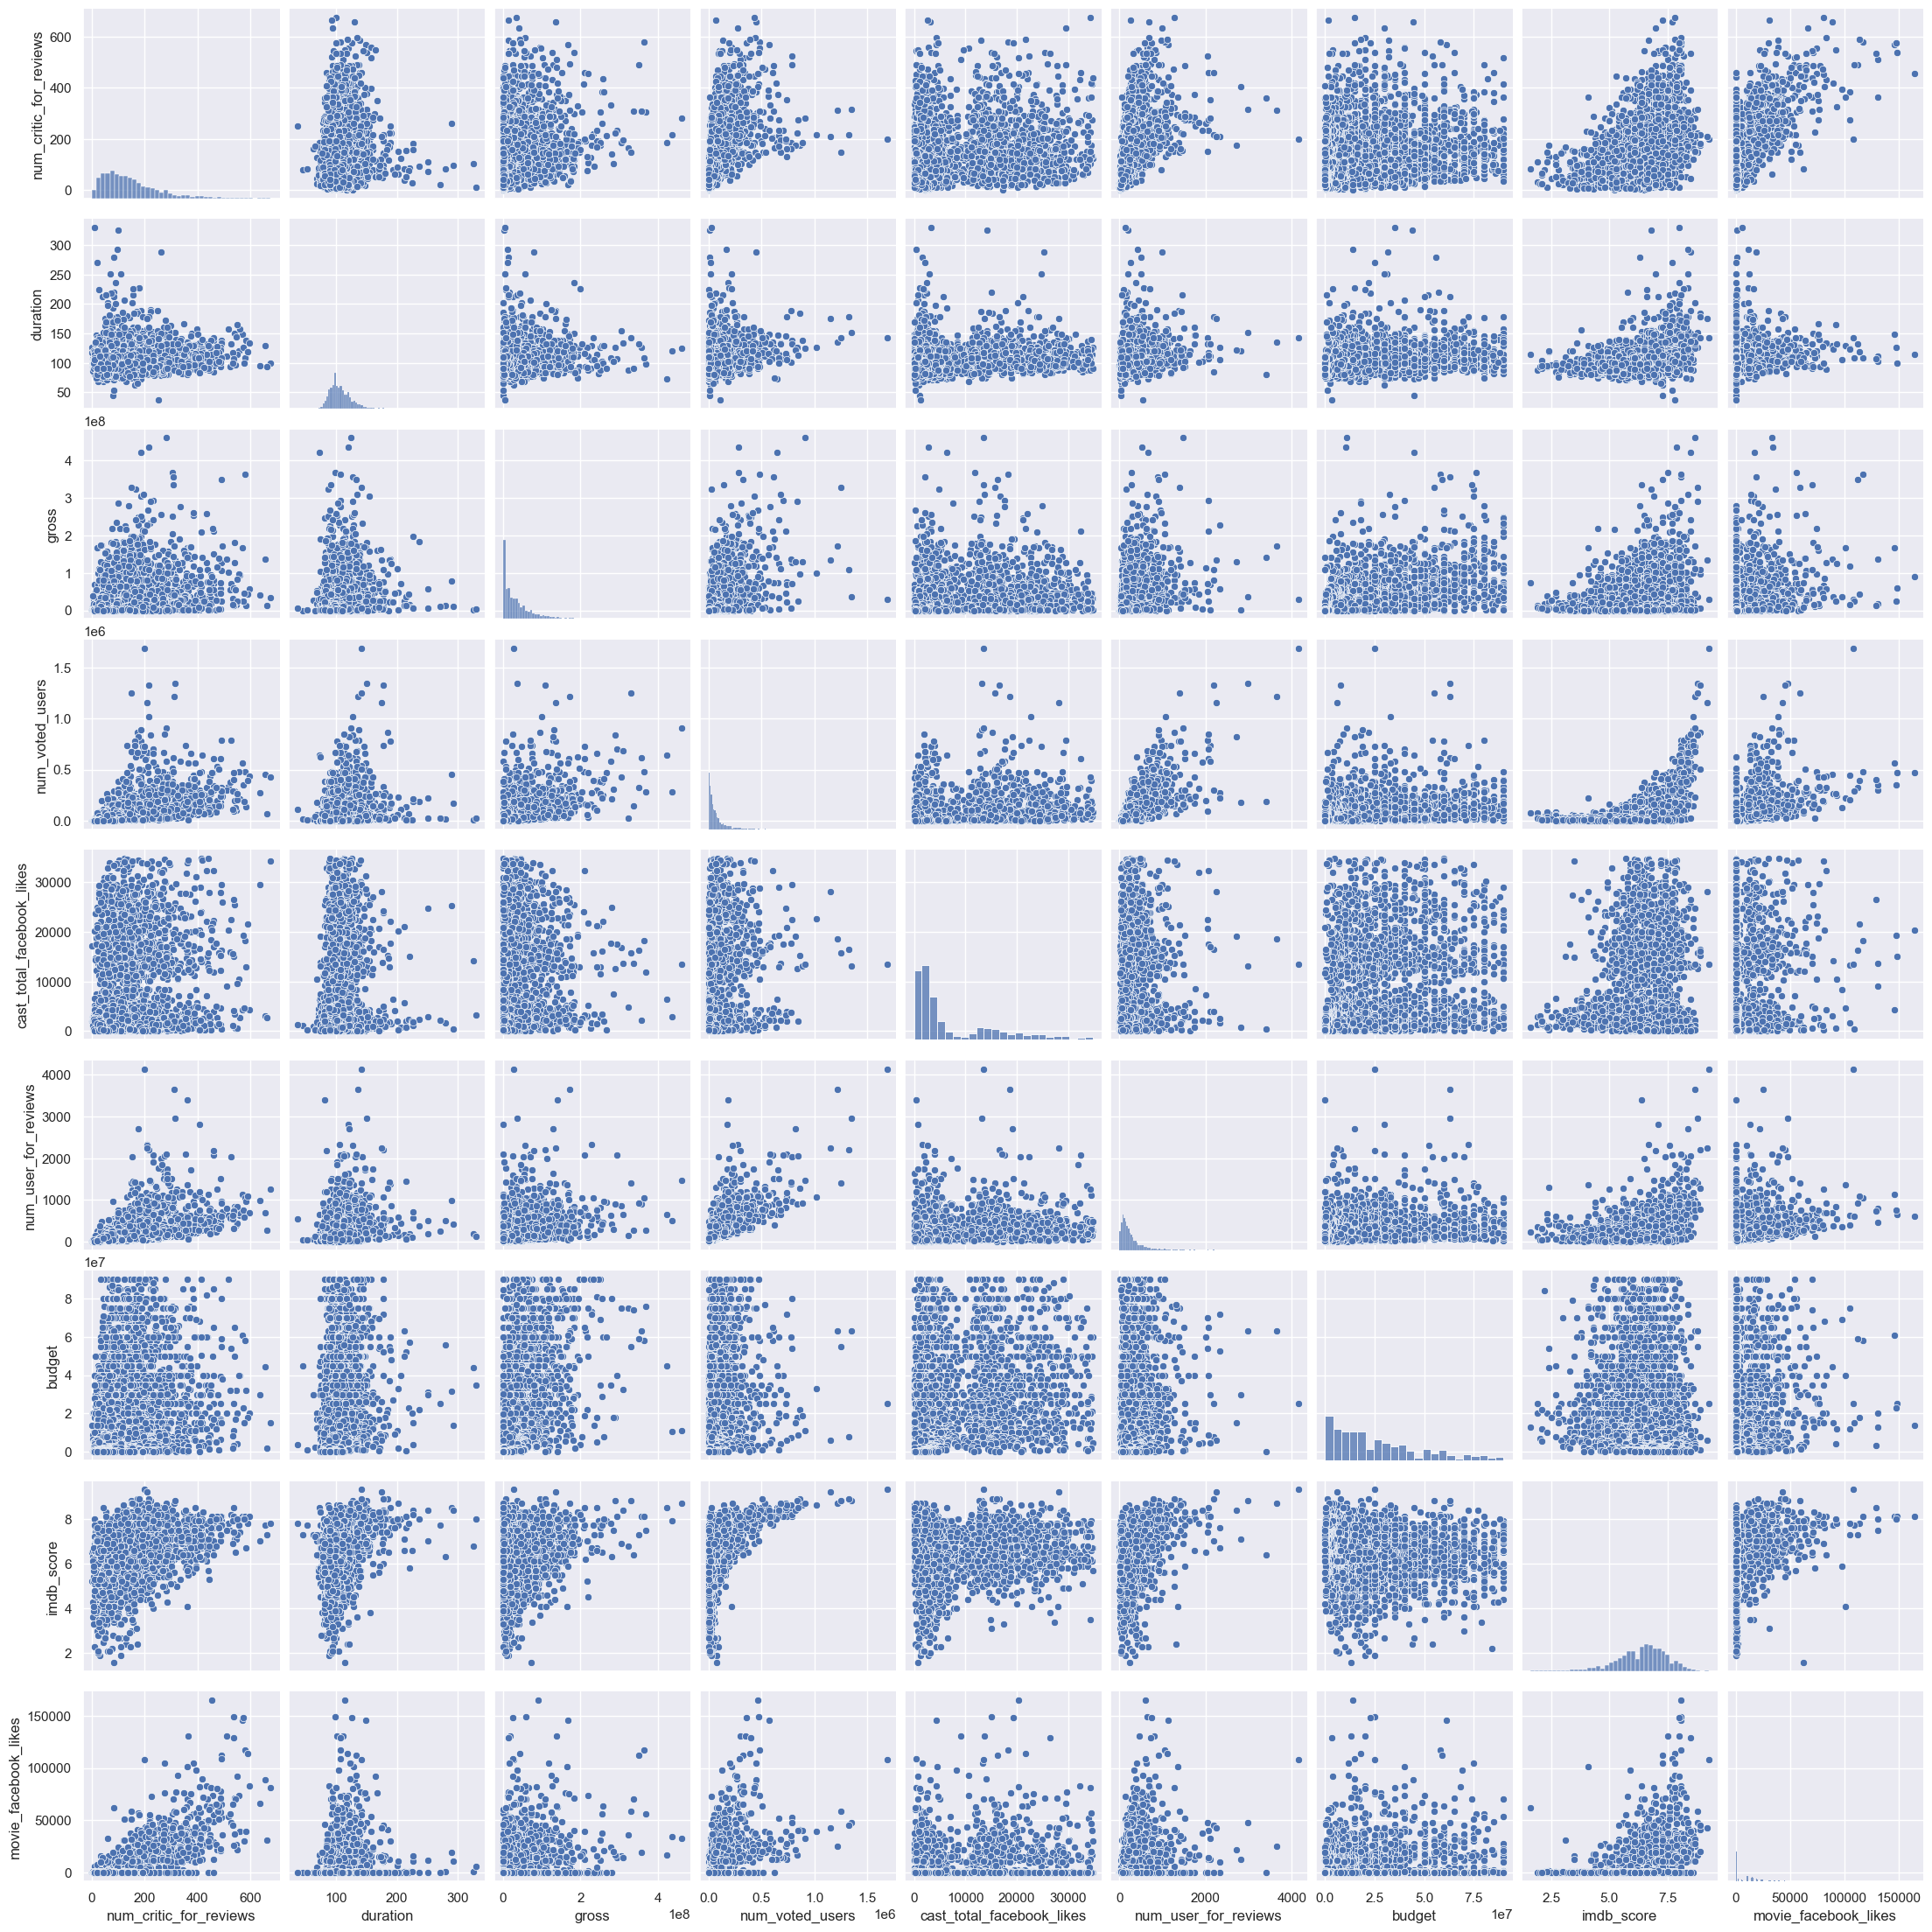

In [105]:
sns.set()
cols = ['num_critic_for_reviews', 'duration',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'budget', 'imdb_score', 'movie_facebook_likes']
sns.pairplot(df[cols], size = 2.5)
plt.show()

# Splitting Data

In [112]:
clean_df = df.drop(['color', 'director_name', 'genres', 'actor_1_name', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
                    'language', 'country', 'content_rating', 'title_year', 'aspect_ratio', 'actor_2_name'], axis=1)

In [113]:
X = clean_df.drop('imdb_score', axis=1)
y = clean_df['imdb_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling Data

# Device Check

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# MAPE & RMSE Metrics

# Modelling